# IF3270 Machine Learning | Tugas Besar 2


Group Number: 46

Group Members:
- Ariel Herfrison (13522002)
- Zachary Samuel Tobing (13522016)
- Imam Hanif Mulyarahman (13522030)

## Import Libraries

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.metrics import F1Score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import os
from scipy.signal import correlate2d
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

seed = 42
os.environ['PYTHONHASHSEED']=str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## Import Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Shapes of the data
print("Training data shape:", x_train.shape)   # (50000, 32, 32, 3)
print("Training labels shape:", y_train.shape) # (50000, 1)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Data type
print("Data type:", x_train.dtype)

# Number of classes
num_classes = len(set(y_train.flatten()))
print("Number of classes:", num_classes)

# Unique labels
import numpy as np
print("Unique labels:", np.unique(y_train))


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Data type: uint8
Number of classes: 10
Unique labels: [0 1 2 3 4 5 6 7 8 9]


# Split Training Set and Validation Set

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,        # 20% for validation
    random_state=42,      # for reproducibility
    stratify=y_train      # keep class distribution
)


# Data Cleaning and Preprocessing

In [ ]:
# Normalize pixels
x_train = x_train.astype("float32") / 255.0
x_val   = x_val.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


## Compile Preprocessing Pipeline

In [ ]:
# SAMPLE MODEL WHICH WOULD BE USED FOR TRAINING
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Pooling layer

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),                                                      # Flatten layer
    Dense(64, activation='relu'),                                   # Dense layer
    Dense(10, activation='softmax')                                 # Output layer
])

f1 = F1Score(average='macro')

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=[f1]
)

model.summary()

c:\Users\zstob\Documents\GitHub\Tubes2_ML\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

# Modeling and Validation

## 4.1 Variation 1

### 4.1.1 Modeling

#### 4.1.1.1 Model 1 (1 layer)

In [ ]:
model_1conv = Sequential()
model_1conv.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1conv.add(MaxPooling2D((2, 2)))
model_1conv.add(GlobalAveragePooling2D())
model_1conv.add(Dense(64, activation='relu'))
model_1conv.add(Dense(10, activation='softmax'))

model_1conv.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=[f1]
)

history_1conv = model_1conv.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - f1_score: 0.1925 - loss: 2.1969 - val_f1_score: 0.1925 - val_loss: 2.0110
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - f1_score: 0.1946 - loss: 1.9719 - val_f1_score: 0.1945 - val_loss: 1.8751
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - f1_score: 0.1951 - loss: 1.8580 - val_f1_score: 0.1948 - val_loss: 1.8005
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - f1_score: 0.1954 - loss: 1.7836 - val_f1_score: 0.1950 - val_loss: 1.7492
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - f1_score: 0.1955 - loss: 1.7396 - val_f1_score: 0.1952 - val_loss: 1.7208
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - f1_score: 0.1955 - loss: 1.7168 - val_f1_score: 0.1952 - val_loss: 1.7021
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - f1_score: 0.1955 - loss: 1.7014 - val_f1_score: 0.1953 - val_loss: 1.6898
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - f1_score: 0.1955 - loss: 1.6894 - val_f1_score: 0

#### 4.1.1.2 Model 2 (2 layers)

In [ ]:
model_2conv = Sequential()
model_2conv.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2conv.add(MaxPooling2D((2, 2)))
model_2conv.add(Conv2D(64, (3, 3), activation='relu'))
model_2conv.add(MaxPooling2D((2, 2)))
model_2conv.add(GlobalAveragePooling2D())
model_2conv.add(Dense(64, activation='relu'))
model_2conv.add(Dense(10, activation='softmax'))

model_2conv.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=[f1]
)

history_2conv = model_2conv.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - f1_score: 0.1951 - loss: 2.1000 - val_f1_score: 0.1928 - val_loss: 1.8011
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - f1_score: 0.1950 - loss: 1.7510 - val_f1_score: 0.1947 - val_loss: 1.6881
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - f1_score: 0.1952 - loss: 1.6561 - val_f1_score: 0.1949 - val_loss: 1.6228
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - f1_score: 0.1953 - loss: 1.5794 - val_f1_score: 0.1952 - val_loss: 1.5553
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - f1_score: 0.1954 - loss: 1.5100 - val_f1_score: 0.1954 - val_loss: 1.4734
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - f1_score: 0.1955 - loss: 1.4538 - val_f1_score: 0.1954 - val_loss: 1.4210
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - f1_score: 0.1955 - loss: 1.4141 - val_f1_score: 0.1955 - val_loss: 1.3892
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - f1_score: 0.1955 - loss: 1.3847 - 

#### 4.1.1.3 Model 3 (3 layers)

In [ ]:
model_3conv = Sequential()
model_3conv.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3conv.add(MaxPooling2D((2, 2)))
model_3conv.add(Conv2D(64, (3, 3), activation='relu'))
model_3conv.add(MaxPooling2D((2, 2)))
model_3conv.add(Conv2D(128, (3, 3), activation='relu'))
model_3conv.add(MaxPooling2D((2, 2)))
model_3conv.add(GlobalAveragePooling2D())
model_3conv.add(Dense(64, activation='relu'))
model_3conv.add(Dense(10, activation='softmax'))

model_3conv.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=[f1]
)

history_3conv = model_3conv.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - f1_score: 0.1953 - loss: 1.9704 - val_f1_score: 0.1949 - val_loss: 1.5022
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1953 - loss: 1.4851 - val_f1_score: 0.1953 - val_loss: 1.3083
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1955 - loss: 1.3253 - val_f1_score: 0.1953 - val_loss: 1.2139
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1956 - loss: 1.2214 - val_f1_score: 0.1954 - val_loss: 1.1447
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1956 - loss: 1.1398 - val_f1_score: 0.1954 - val_loss: 1.1007
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1956 - loss: 1.0686 - val_f1_score: 0.1954 - val_loss: 1.0572
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1956 - loss: 1.0087 - val_f1_score: 0.1954 - val_loss: 1.0166
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1956 - loss: 0.9545 - 

#### 4.1.2. Comparison and Analysis

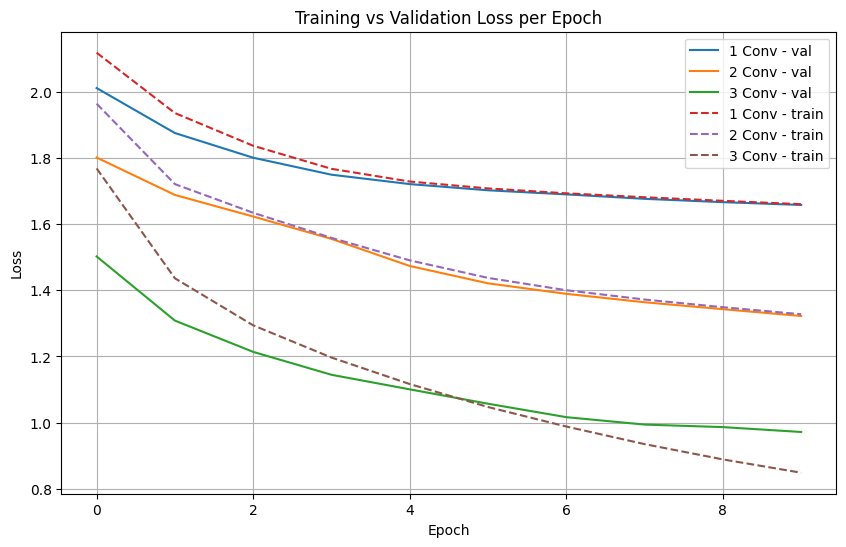

1 Conv Layer → Final Val Loss: 1.6578
2 Conv Layers → Final Val Loss: 1.3223
3 Conv Layers → Final Val Loss: 0.9719


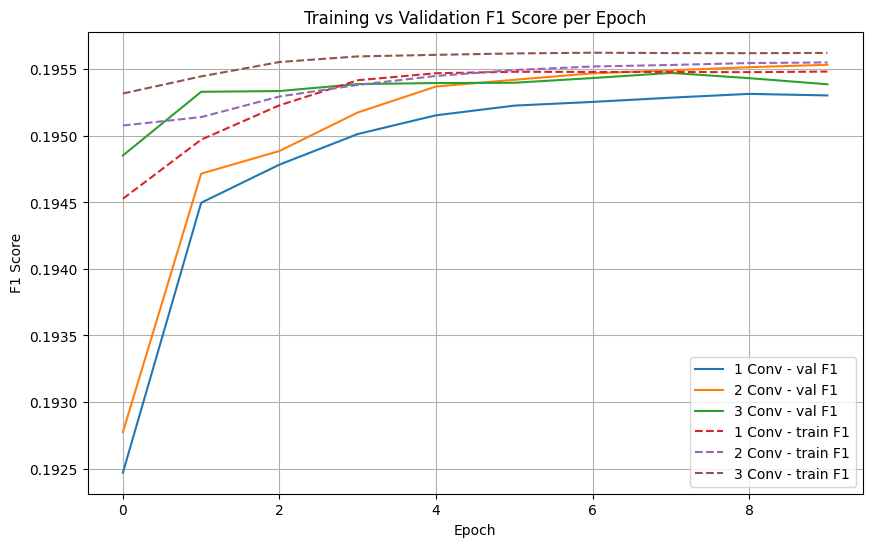

1 Conv Layer → Final Val Acc: 0.1953
2 Conv Layers → Final Val Acc: 0.1955
3 Conv Layers → Final Val Acc: 0.1954


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_1conv.history['val_loss'], label='1 Conv - val')
plt.plot(history_2conv.history['val_loss'], label='2 Conv - val')
plt.plot(history_3conv.history['val_loss'], label='3 Conv - val')
plt.plot(history_1conv.history['loss'], linestyle='--', label='1 Conv - train')
plt.plot(history_2conv.history['loss'], linestyle='--', label='2 Conv - train')
plt.plot(history_3conv.history['loss'], linestyle='--', label='3 Conv - train')
plt.title("Training vs Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

print(f"1 Conv Layer → Final Val Loss: {history_1conv.history['val_loss'][-1]:.4f}")
print(f"2 Conv Layers → Final Val Loss: {history_2conv.history['val_loss'][-1]:.4f}")
print(f"3 Conv Layers → Final Val Loss: {history_3conv.history['val_loss'][-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history_1conv.history['val_f1_score'], label='1 Conv - val F1')
plt.plot(history_2conv.history['val_f1_score'], label='2 Conv - val F1')
plt.plot(history_3conv.history['val_f1_score'], label='3 Conv - val F1')
plt.plot(history_1conv.history['f1_score'], linestyle='--', label='1 Conv - train F1')
plt.plot(history_2conv.history['f1_score'], linestyle='--', label='2 Conv - train F1')
plt.plot(history_3conv.history['f1_score'], linestyle='--', label='3 Conv - train F1')
plt.title("Training vs Validation F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.show()

print(f"1 Conv Layer → Final Val Acc: {history_1conv.history['val_f1_score'][-1]:.4f}")
print(f"2 Conv Layers → Final Val Acc: {history_2conv.history['val_f1_score'][-1]:.4f}")
print(f"3 Conv Layers → Final Val Acc: {history_3conv.history['val_f1_score'][-1]:.4f}")

Peningkatan jumlah convolution layer meningkatkan performa model, dengan jumlah convolution layer yang lebih banyak memiliki nilai loss awal lebih kecil dan penurunan loss yang cenderung lebih cepat, baik pada training maupun validation.

Nilai awal F1 score pada jumlah filter besar lebih tinggi dan nilai pada validation jauh lebih besar, serta nilai pada jumlah filter kecil memiliki nilai awal F1 score yang sangat rendah. Meskipun begitu, semua nilai F1 score pada akhirnya mencapai nilai yang serupa dengan tetap mempertahankan urutan awalnya.

## 4.2 Variasi Banyak Filter

### 4.2.1 Modeling

#### 4.2.1.1 Model 1 (16-32 filters)

In [ ]:
# Model 1: 16-32 filters
model_few = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_few.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_few = model_few.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - f1_score: 0.1949 - loss: 2.0846 - val_f1_score: 0.1926 - val_loss: 1.8054
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - f1_score: 0.1950 - loss: 1.7505 - val_f1_score: 0.1943 - val_loss: 1.7176
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - f1_score: 0.1952 - loss: 1.6774 - val_f1_score: 0.1949 - val_loss: 1.6862
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - f1_score: 0.1953 - loss: 1.6239 - val_f1_score: 0.1952 - val_loss: 1.6298
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - f1_score: 0.1954 - loss: 1.5711 - val_f1_score: 0.1953 - val_loss: 1.5801
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - f1_score: 0.1954 - loss: 1.5252 - val_f1_score: 0.1954 - val_loss: 1.5217
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - f1_score: 0.1954 - loss: 1.4874 - val_f1_score: 0.1954 - val_loss: 1.4760
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - f1_score: 0.1955 - loss: 1.4567 - val_f1_sc

#### 4.2.1.2 Model 2 (32-64 filters)

In [ ]:
# Model 2: 32-64 filters
model_med = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_med.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_med = model_med.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - f1_score: 0.1952 - loss: 2.0484 - val_f1_score: 0.1934 - val_loss: 1.7146
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - f1_score: 0.1952 - loss: 1.6878 - val_f1_score: 0.1946 - val_loss: 1.6001
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1953 - loss: 1.5875 - val_f1_score: 0.1951 - val_loss: 1.5366
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - f1_score: 0.1954 - loss: 1.5049 - val_f1_score: 0.1952 - val_loss: 1.4600
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - f1_score: 0.1955 - loss: 1.4416 - val_f1_score: 0.1953 - val_loss: 1.4065
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - f1_score: 0.1955 - loss: 1.3994 - val_f1_score: 0.1954 - val_loss: 1.3677
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - f1_score: 0.1955 - loss: 1.3655 - val_f1_score: 0.1954 - val_loss: 1.3387
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1955 - loss: 1.3374 - 

#### 4.2.1.3 Model 3 (64-128 filters)

In [ ]:
# Model 3: 64-128 filters
model_many = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_many.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_many = model_many.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - f1_score: 0.1954 - loss: 2.0118 - val_f1_score: 0.1942 - val_loss: 1.6784
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - f1_score: 0.1952 - loss: 1.6594 - val_f1_score: 0.1950 - val_loss: 1.5200
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - f1_score: 0.1954 - loss: 1.5310 - val_f1_score: 0.1953 - val_loss: 1.4416
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - f1_score: 0.1955 - loss: 1.4421 - val_f1_score: 0.1954 - val_loss: 1.3847
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - f1_score: 0.1955 - loss: 1.3834 - val_f1_score: 0.1954 - val_loss: 1.3430
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - f1_score: 0.1955 - loss: 1.3372 - val_f1_score: 0.1955 - val_loss: 1.3031
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - f1_score: 0.1956 - loss: 1.3009 - val_f1_score: 0.1955 - val_loss: 1.2724
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - f1_score: 0.1956 - loss: 1.2683 - 

### 4.2.2 Comparison and Analysis

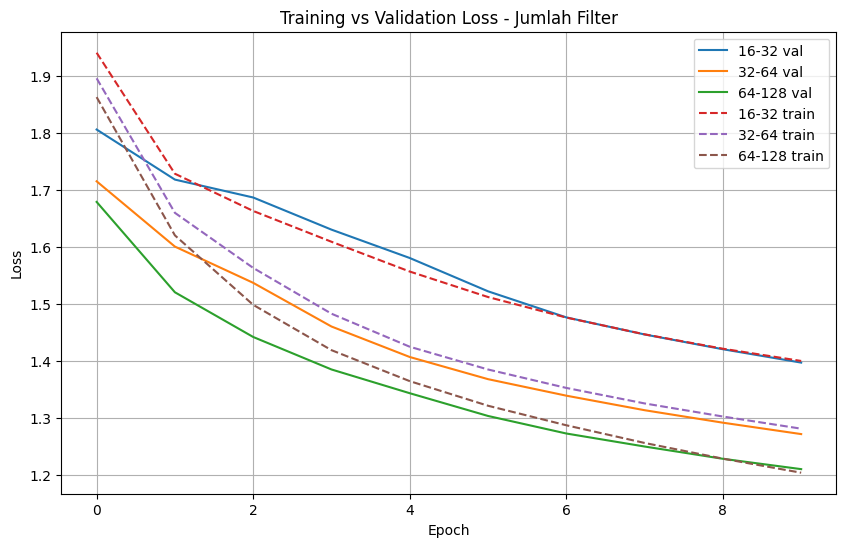

1 Conv Layer → Final Val Loss: 1.3967
2 Conv Layers → Final Val Loss: 1.2713
3 Conv Layers → Final Val Loss: 1.2099


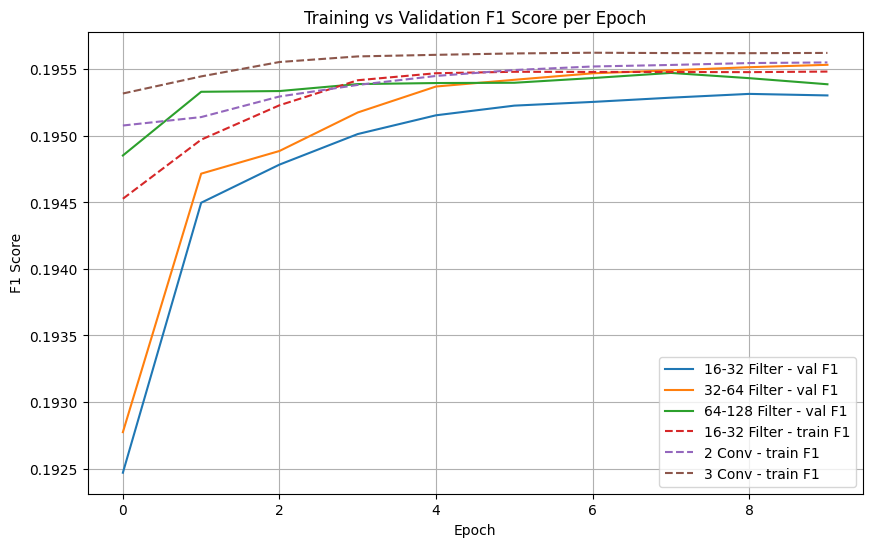

16-32 Filter → Final Val Acc: 0.1955
32-64 Filter → Final Val Acc: 0.1954
64-128 Filter → Final Val Acc: 0.1955


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_few.history['val_loss'], label='16-32 val')
plt.plot(history_med.history['val_loss'], label='32-64 val')
plt.plot(history_many.history['val_loss'], label='64-128 val')
plt.plot(history_few.history['loss'], linestyle='--', label='16-32 train')
plt.plot(history_med.history['loss'], linestyle='--', label='32-64 train')
plt.plot(history_many.history['loss'], linestyle='--', label='64-128 train')
plt.title("Training vs Validation Loss - Jumlah Filter")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

print(f"16-32 Filter → Final Val Loss: {history_few.history['val_loss'][-1]:.4f}")
print(f"32-64 Filter → Final Val Loss: {history_med.history['val_loss'][-1]:.4f}")
print(f"64-128 Filter → Final Val Loss: {history_many.history['val_loss'][-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history_1conv.history['val_f1_score'], label='16-32 Filter - val F1')
plt.plot(history_2conv.history['val_f1_score'], label='32-64 Filter - val F1')
plt.plot(history_3conv.history['val_f1_score'], label='64-128 Filter - val F1')
plt.plot(history_1conv.history['f1_score'], linestyle='--', label='16-32 Filter - train F1')
plt.plot(history_2conv.history['f1_score'], linestyle='--', label='32-64 Filter - train F1')
plt.plot(history_3conv.history['f1_score'], linestyle='--', label='64-128 Filter - train F1')
plt.title("Training vs Validation F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.show()

print(f"16-32 Filter → Final Val Acc: {history_few.history['val_f1_score'][-1]:.4f}")
print(f"32-64 Filter → Final Val Acc: {history_med.history['val_f1_score'][-1]:.4f}")
print(f"64-128 Filter → Final Val Acc: {history_many.history['val_f1_score'][-1]:.4f}")


Peningkatan jumlah filter pada setiap convolution layer meningkatkan performa model, dengan jumlah filter pada setiap convolution layer yang lebih banyak memiliki nilai loss awal lebih kecil, baik pada training maupun validation. 

Nilai awal F1 score pada jumlah filter besar lebih tinggi dan nilai pada validation jauh lebih besar, serta nilai pada jumlah filter kecil memiliki nilai awal F1 score yang sangat rendah. Meskipun begitu, semua nilai F1 score pada akhirnya mencapai nilai yang serupa dengan tetap mempertahankan urutan awalnya.

## 4.3 Variasi Ukuran Filter

### 4.3.1 Modeling

#### 4.3.1.1 Model 1 (3x3)

In [ ]:
# 3x3, 3x3
model_3x3 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_3x3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_3x3 = model_3x3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)


c:\Users\zstob\Documents\GitHub\Tubes2_ML\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - f1_score: 0.1954 - loss: 2.0630 - val_f1_score: 0.1944 - val_loss: 1.7743
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1952 - loss: 1.7165 - val_f1_score: 0.1949 - val_loss: 1.6647
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1953 - loss: 1.6341 - val_f1_score: 0.1951 - val_loss: 1.5650
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - f1_score: 0.1954 - loss: 1.5460 - val_f1_score: 0.1952 - val_loss: 1.4853
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - f1_score: 0.1954 - loss: 1.4704 - val_f1_score: 0.1952 - val_loss: 1.4298
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - f1_score: 0.1955 - loss: 1.4203 - val_f1_score: 0.1954 - val_loss: 1.3874
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - f1_score: 0.1955 - loss: 1.3826 - val_f1_score: 0.1955 - val_loss: 1.3561
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - f1_score: 0.1955 - loss: 1.3515 - 

#### 4.3.1.2 Model 2 (5x5)

In [ ]:
# 5x5, 3x3
model_5x3 = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_5x3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_5x3 = model_5x3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - f1_score: 0.1951 - loss: 2.0698 - val_f1_score: 0.1938 - val_loss: 1.7041
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1951 - loss: 1.6922 - val_f1_score: 0.1947 - val_loss: 1.6098
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - f1_score: 0.1953 - loss: 1.6013 - val_f1_score: 0.1952 - val_loss: 1.5088
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1954 - loss: 1.5146 - val_f1_score: 0.1951 - val_loss: 1.4560
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - f1_score: 0.1955 - loss: 1.4557 - val_f1_score: 0.1952 - val_loss: 1.4013
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - f1_score: 0.1955 - loss: 1.4105 - val_f1_score: 0.1953 - val_loss: 1.3619
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - f1_score: 0.1955 - loss: 1.3726 - val_f1_score: 0.1953 - val_loss: 1.3358
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - f1_score: 0.1955 - loss: 1.3405 - 

#### 4.3.1.3 Model 3 (7x7)

In [ ]:
# 7x7, 3x3
model_7x3 = Sequential([
    Conv2D(32, (7,7), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_7x3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_7x3 = model_7x3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - f1_score: 0.1949 - loss: 2.0868 - val_f1_score: 0.1938 - val_loss: 1.7390
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - f1_score: 0.1950 - loss: 1.7205 - val_f1_score: 0.1950 - val_loss: 1.6206
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1953 - loss: 1.6174 - val_f1_score: 0.1952 - val_loss: 1.5618
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - f1_score: 0.1954 - loss: 1.5483 - val_f1_score: 0.1953 - val_loss: 1.4978
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1954 - loss: 1.4963 - val_f1_score: 0.1953 - val_loss: 1.4503
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - f1_score: 0.1954 - loss: 1.4519 - val_f1_score: 0.1953 - val_loss: 1.4059
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - f1_score: 0.1955 - loss: 1.4073 - val_f1_score: 0.1953 - val_loss: 1.3625
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - f1_score: 0.1955 - loss: 1.3639 - 

### 4.3.2 Comparison and Analysis

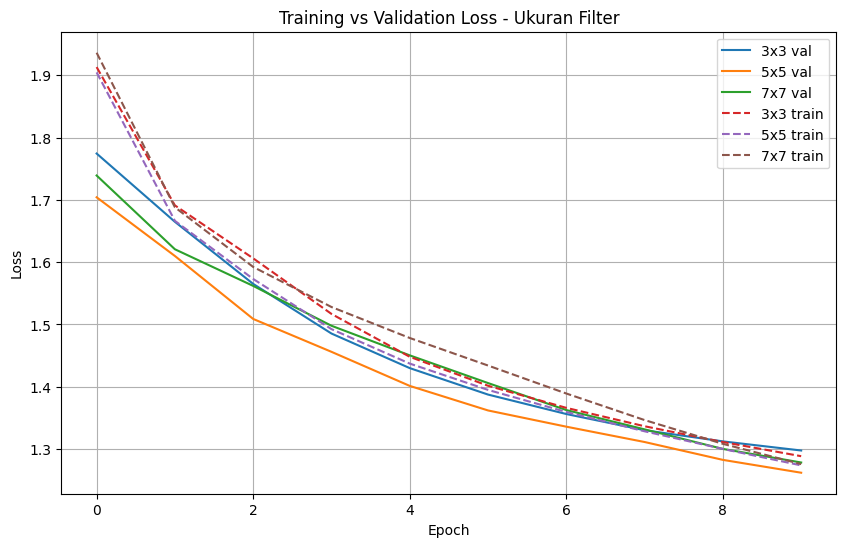

3x3 Filter → Final Val Loss: 1.2976
5x5 Filter → Final Val Loss: 1.2619
7x7 Filter → Final Val Loss: 1.2783


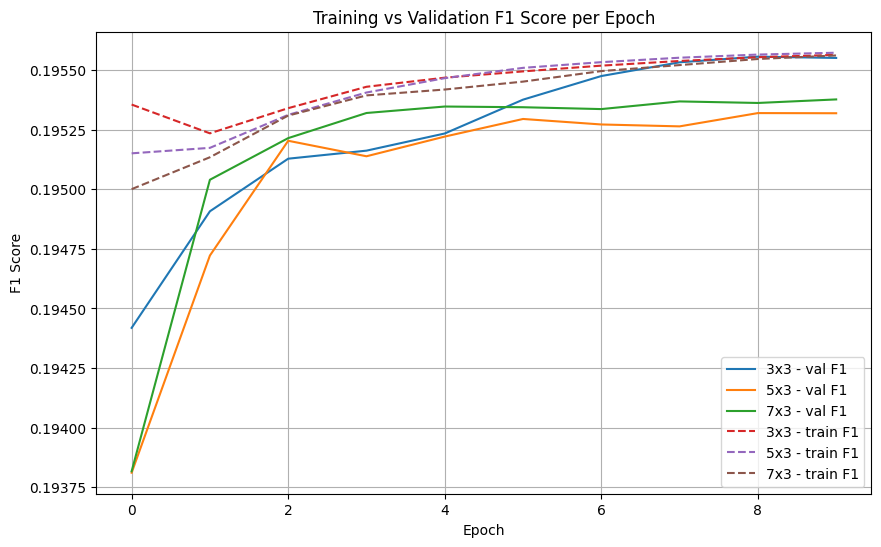

3x3 Filter → Final Val Acc: 0.1956
5x5 Filter → Final Val Acc: 0.1953
7x7 Filter → Final Val Acc: 0.1954


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_3x3.history['val_loss'], label='3x3 val')
plt.plot(history_5x3.history['val_loss'], label='5x3 val')
plt.plot(history_7x3.history['val_loss'], label='7x3 val')
plt.plot(history_3x3.history['loss'], linestyle='--', label='3x3 train')
plt.plot(history_5x3.history['loss'], linestyle='--', label='5x3 train')
plt.plot(history_7x3.history['loss'], linestyle='--', label='7x3 train')
plt.title("Training vs Validation Loss - Ukuran Filter")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

print(f"3x3 Filter → Final Val Loss: {history_3x3.history['val_loss'][-1]:.4f}")
print(f"5x5 Filter → Final Val Loss: {history_5x3.history['val_loss'][-1]:.4f}")
print(f"7x7 Filter → Final Val Loss: {history_7x3.history['val_loss'][-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history_3x3.history['val_f1_score'], label='3x3 - val F1')
plt.plot(history_5x3.history['val_f1_score'], label='5x3 - val F1')
plt.plot(history_7x3.history['val_f1_score'], label='7x3 - val F1')
plt.plot(history_3x3.history['f1_score'], linestyle='--', label='3x3 - train F1')
plt.plot(history_5x3.history['f1_score'], linestyle='--', label='5x3 - train F1')
plt.plot(history_7x3.history['f1_score'], linestyle='--', label='7x3 - train F1')
plt.title("Training vs Validation F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.show()

print(f"3x3 Filter → Final Val Acc: {history_3x3.history['val_f1_score'][-1]:.4f}")
print(f"5x5 Filter → Final Val Acc: {history_5x3.history['val_f1_score'][-1]:.4f}")
print(f"7x7 Filter → Final Val Acc: {history_7x3.history['val_f1_score'][-1]:.4f}")

Peningkatan ukuran filter setiap convolution layer meningkatkan performa model, dengan ukuran filter setiap convolution layer yang lebih banyak memiliki nilai loss awal lebih kecil, baik pada training maupun validation. Akan tetapi, pada 7x3 ditemukan performanya lebih buruk daripada 5x3, dan bahkan 3x3 pada training. Semua nilai akhir lossnya akhirnya memiliki nilai yang sangat serupa.

Nilai awal F1 score pada ukuran filter kecil justru lebih tinggi dan nilai pada validation jauh lebih besar, serta nilai pada ukuran filter besar memiliki nilai awal F1 score yang sangat rendah. Meskipun begitu, semua nilai F1 score pada akhirnya mencapai nilai yang serupa dengan tetap mempertahankan urutan awalnya, kecuali 3x3 pada validation yang menyerupai training.

## 4.4 Variasi Jenis Pooling Layer

### 4.4.1 Modeling

#### 4.4.1.1 Model 1 (MaxPooling2D)

In [ ]:
# Max Pooling
model_max = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_max.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_max = model_max.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - f1_score: 0.1951 - loss: 2.1001 - val_f1_score: 0.1936 - val_loss: 1.7617
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - f1_score: 0.1951 - loss: 1.7334 - val_f1_score: 0.1948 - val_loss: 1.6461
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - f1_score: 0.1953 - loss: 1.6387 - val_f1_score: 0.1951 - val_loss: 1.5749
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1954 - loss: 1.5696 - val_f1_score: 0.1953 - val_loss: 1.5197
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1955 - loss: 1.5082 - val_f1_score: 0.1954 - val_loss: 1.4559
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1955 - loss: 1.4563 - val_f1_score: 0.1954 - val_loss: 1.4108
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1955 - loss: 1.4139 - val_f1_score: 0.1954 - val_loss: 1.3712
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1955 - loss: 1.3788 - 

#### 4.4.1.2 Model 2 (AveragePooling2D)

In [ ]:
# Average Pooling
model_avg = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    AveragePooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D((2,2)),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_avg.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=[f1])
history_avg = model_avg.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, verbose=1)

c:\Users\zstob\Documents\GitHub\Tubes2_ML\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - f1_score: 0.1951 - loss: 2.1179 - val_f1_score: 0.1936 - val_loss: 1.8394
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - f1_score: 0.1951 - loss: 1.7949 - val_f1_score: 0.1942 - val_loss: 1.7078
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1952 - loss: 1.6978 - val_f1_score: 0.1949 - val_loss: 1.6716
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1953 - loss: 1.6475 - val_f1_score: 0.1952 - val_loss: 1.6236
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - f1_score: 0.1954 - loss: 1.5988 - val_f1_score: 0.1952 - val_loss: 1.5768
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1954 - loss: 1.5545 - val_f1_score: 0.1952 - val_loss: 1.5441
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - f1_score: 0.1954 - loss: 1.5177 - val_f1_score: 0.1953 - val_loss: 1.5078
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - f1_score: 0.1955 - loss: 1.4858 - 

### 4.4.2 Comparison and Analysis

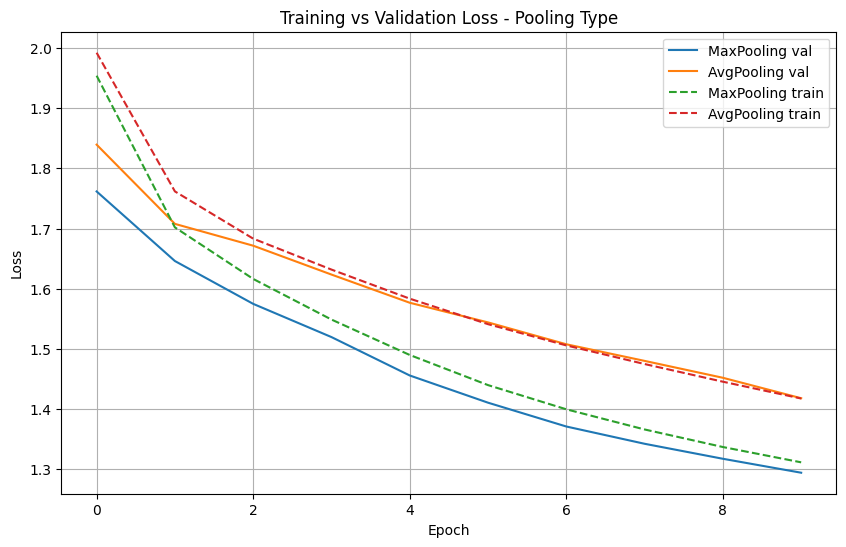

MaxPooling Val Acc: 0.19549477100372314
AvgPooling Val Acc: 0.1953907161951065


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_max.history['val_loss'], label='MaxPooling val')
plt.plot(history_avg.history['val_loss'], label='AvgPooling val')
plt.plot(history_max.history['loss'], linestyle='--', label='MaxPooling train')
plt.plot(history_avg.history['loss'], linestyle='--', label='AvgPooling train')
plt.title("Training vs Validation Loss - Pooling Type")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

print(f"MaxPooling → Final Val Loss: {history_max.history['val_loss'][-1]:.4f}")
print(f"AvgPooling → Final Val Loss: {history_avg.history['val_loss'][-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history_max.history['val_f1_score'], label='MaxPooling - val F1')
plt.plot(history_avg.history['val_f1_score'], label='AvgPooling - val F1')
plt.plot(history_max.history['f1_score'], linestyle='--', label='MaxPooling - train F1')
plt.plot(history_avg.history['f1_score'], linestyle='--', label='AvgPooling - train F1')
plt.title("Training vs Validation F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.show()

print(f"MaxPooling → Final Val Acc: {history_max.history['val_f1_score'][-1]:.4f}")
print(f"AvgPooling → Final Val Acc: {history_avg.history['val_f1_score'][-1]:.4f}")

# 5. Model from Scratch

## 5.1. Modeling

In [ ]:
# Model defined above (Compile and Preprocessing Pipeline)
model.summary()
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))
model.save_weights("./cnn_weights.weights.h5")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - f1_score: 0.1956 - loss: 0.8686 - val_f1_score: 0.1956 - val_loss: 0.9825
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - f1_score: 0.1956 - loss: 0.8200 - val_f1_score: 0.1957 - val_loss: 0.9788
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - f1_score: 0.1956 - loss: 0.7756 - val_f1_score: 0.1957 - val_loss: 0.9900
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - f1_score: 0.1956 - loss: 0.7319 - val_f1_score: 0.1957 - val_loss: 0.9863
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - f1_score: 0.1956 - loss: 0.6926 - val_f1_score: 0.1958 - val_loss: 1.0142


In [ ]:
# Helper functions
def relu(x): return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def conv2d_forward(x, w, b):
    n_filters, _, kh, kw = w.shape
    h_out = x.shape[1] - kh + 1
    w_out = x.shape[2] - kw + 1
    out = np.zeros((n_filters, h_out, w_out))
    for f in range(n_filters):
        for c in range(x.shape[0]):
            out[f] += correlate2d(x[c], w[f, c], mode='valid')
        out[f] += b[f]
    return relu(out)

def maxpool2d_forward(x, size=2, stride=2):
    n_c, h, w = x.shape
    h_out = h // size
    w_out = w // size
    out = np.zeros((n_c, h_out, w_out))
    for c in range(n_c):
        for i in range(h_out):
            for j in range(w_out):
                out[c, i, j] = np.max(x[c, i*stride:i*stride+size, j*stride:j*stride+size])
    return out

def flatten_forward(x): return x.flatten()

def dense_forward(x, w, b, activation=None):
    z = np.dot(x, w) + b
    if activation == 'relu': return relu(z)
    if activation == 'softmax': return softmax(z)
    return z

# Full forward pass from scratch
def forward_pass_scratch(x, weights):
    w0, b0 = weights[0]
    w0 = np.transpose(w0, (3, 2, 0, 1))  # Keras (H, W, C, F) → (F, C, H, W)
    x = np.transpose(x, (2, 0, 1))       # (H, W, C) → (C, H, W)
    x = conv2d_forward(x, w0, b0)

    x = maxpool2d_forward(x)

    w1, b1 = weights[1]
    w1 = np.transpose(w1, (3, 2, 0, 1))
    x = conv2d_forward(x, w1, b1)

    x = maxpool2d_forward(x)
    x = flatten_forward(x)

    w2, b2 = weights[2]
    x = dense_forward(x, w2, b2, activation='relu')

    w3, b3 = weights[3]
    x = dense_forward(x, w3, b3, activation='softmax')

    return x

In [ ]:
# Compare predictions

# Load model weights
model.load_weights("./cnn_weights.weights.h5")
weights = [layer.get_weights() for layer in model.layers if layer.get_weights()]

# Predict using Keras
keras_preds = model.predict(x_test, verbose=0)
keras_classes = np.argmax(keras_preds, axis=1)

# Predict using manual forward pass
scratch_preds = np.array([forward_pass_scratch(img, weights) for img in x_test])
scratch_classes = np.argmax(scratch_preds, axis=1)


Match accuracy: 12.20%


## 5.2. Comparison & Analysis

🔹 Keras F1 Macro: 0.6681
🔹 Scratch F1 Macro: 0.0906
🔹 Keras F1 Micro: 0.6662
🔹 Scratch F1 Micro: 0.1134
Class 0: Keras F1 = 0.6951, Scratch F1 = 0.1100
Class 1: Keras F1 = 0.7946, Scratch F1 = 0.0521
Class 2: Keras F1 = 0.5751, Scratch F1 = 0.1944
Class 3: Keras F1 = 0.4945, Scratch F1 = 0.1195
Class 4: Keras F1 = 0.6218, Scratch F1 = 0.0407
Class 5: Keras F1 = 0.5524, Scratch F1 = 0.1051
Class 6: Keras F1 = 0.7622, Scratch F1 = 0.0000
Class 7: Keras F1 = 0.7232, Scratch F1 = 0.1559
Class 8: Keras F1 = 0.7383, Scratch F1 = 0.0907
Class 9: Keras F1 = 0.7234, Scratch F1 = 0.0374


C:\Users\zstob\AppData\Local\Temp\ipykernel_22012\2411970994.py:38: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\zstob\Documents\GitHub\Tubes2_ML\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


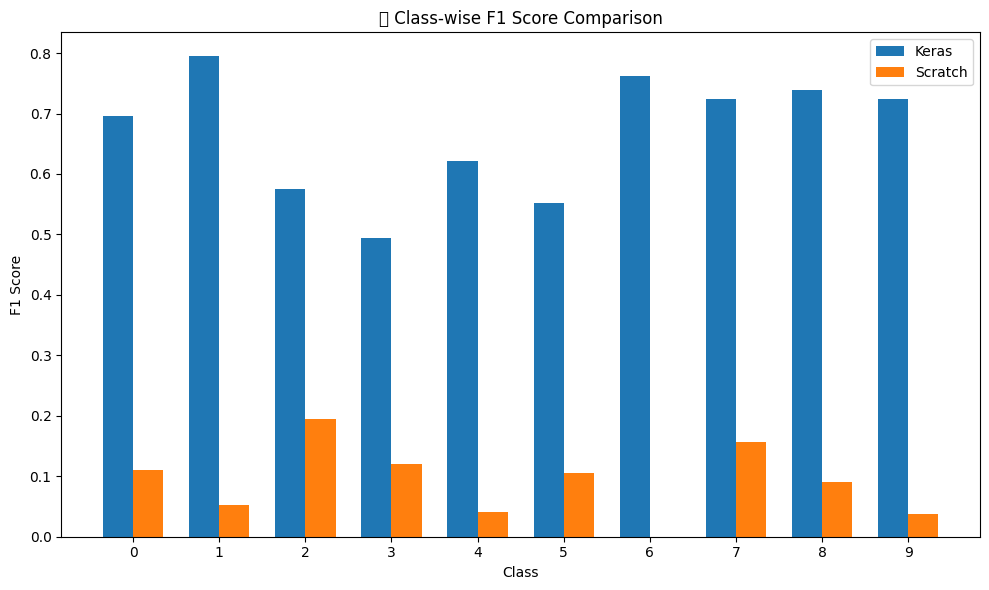

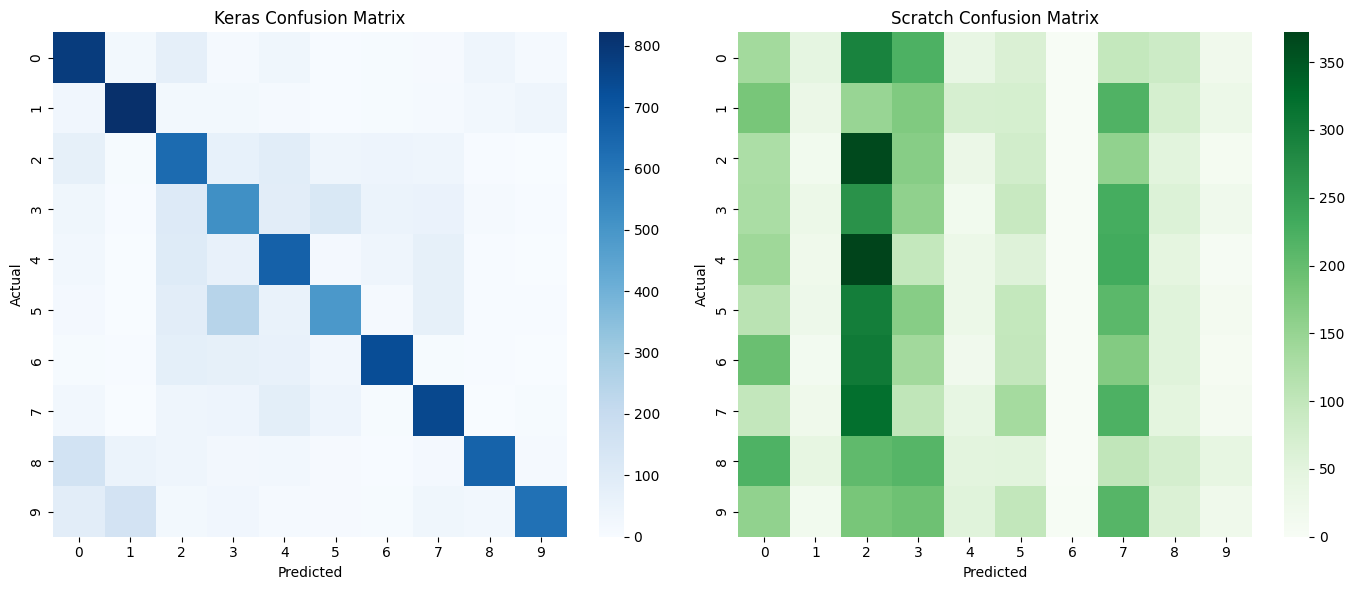

🔹 Keras Classification Report
               precision    recall  f1-score   support

           0       0.63      0.78      0.70      1000
           1       0.77      0.82      0.79      1000
           2       0.53      0.63      0.58      1000
           3       0.47      0.52      0.49      1000
           4       0.58      0.67      0.62      1000
           5       0.63      0.49      0.55      1000
           6       0.80      0.73      0.76      1000
           7       0.70      0.75      0.72      1000
           8       0.84      0.66      0.74      1000
           9       0.88      0.62      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

🔹 Scratch Classification Report
               precision    recall  f1-score   support

           0       0.09      0.14      0.11      1000
           1       0.12      0.03      0.05      1000
           2  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# F1 Score
keras_f1_macro = f1_score(y_test, keras_classes[:len(y_test)], average='macro')
scratch_f1_macro = f1_score(y_test, scratch_classes[:len(y_test)], average='macro')

keras_f1_micro = f1_score(y_test, keras_classes[:len(y_test)], average='micro')
scratch_f1_micro = f1_score(y_test, scratch_classes[:len(y_test)], average='micro')

print(f"🔹 Keras F1 Macro: {keras_f1_macro:.4f}")
print(f"🔹 Scratch F1 Macro: {scratch_f1_macro:.4f}")
print(f"🔹 Keras F1 Micro: {keras_f1_micro:.4f}")
print(f"🔹 Scratch F1 Micro: {scratch_f1_micro:.4f}")

# F1 Score per class
f1_per_class_keras = f1_score(y_test, keras_classes[:len(y_test)], average=None)
f1_per_class_scratch = f1_score(y_test, scratch_classes[:len(y_test)], average=None)

for i in range(10):
    print(f"Class {i}: Keras F1 = {f1_per_class_keras[i]:.4f}, Scratch F1 = {f1_per_class_scratch[i]:.4f}")

# Plotting F1 Score per class
classes = np.arange(10)
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(classes - bar_width/2, f1_per_class_keras, width=bar_width, label='Keras')
plt.bar(classes + bar_width/2, f1_per_class_scratch, width=bar_width, label='Scratch')

plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("🔹 Class-wise F1 Score Comparison")
plt.xticks(classes)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_mat_keras = confusion_matrix(y_test, keras_classes[:len(y_test)])
conf_mat_scratch = confusion_matrix(y_test, scratch_classes[:len(y_test)])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_mat_keras, annot=False, cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Keras Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(conf_mat_scratch, annot=False, cmap="Greens", xticklabels=range(10), yticklabels=range(10))
plt.title("Scratch Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()\

# Classification Report
print("🔹 Keras Classification Report"
      "\n", classification_report(y_test, keras_classes[:len(y_test)], target_names=[str(i) for i in range(10)]))
print("🔹 Scratch Classification Report"
        "\n", classification_report(y_test, scratch_classes[:len(y_test)], target_names=[str(i) for i in range(10)]))

From the comparisons, we can see that the Keras model's predictions are better for each and every class, on all different parameters, unanimously, compared to the manual implementation.